In [1]:
import os
import cv2
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


In [2]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [4]:
TS=(24,24)
train_batch= generator('C:\\Users\\simra\\Desktop\\MINOR PROJECT\\Implement\\data\\train',shuffle=True, batch_size=320,target_size=TS)
valid_batch = generator('C:\\Users\\simra\\Desktop\\MINOR PROJECT\\Implement\\data\\valid',shuffle=True, batch_size=40,target_size=TS)
test_batch= generator('C:\\Users\\simra\\Desktop\\MINOR PROJECT\\Implement\\data\\test',shuffle=True, batch_size=10,target_size=TS)
Train = len(train_batch.classes)//320
Valid = len(valid_batch.classes)//40
Test = len(test_batch.classes)//10
print(Train,Valid,Test)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
10 20 3


In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#64 convolution filters used each of size 3x3
#choose the best features via pooling
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [7]:
#The Adam optimization algorithm is an extension to stochastic gradient descent, loss function is for calculating loss
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
#our model will train on train_batches and will validate on valid_batches, We have made 15 epochs.
#Verbose is 2, which just specifies the verbosity of the log output printed to the console during training.
#We have 3200 training images and 32 per batch so steps_per_epoch is 100
#we have 20 validation images and 2 per batch so validation_steps is 10

history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=10 ,validation_steps=20,verbose=2)

Epoch 1/15


C:\Users\simra\AppData\Local\Temp\ipykernel_8956\3808697167.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=10 ,validation_steps=20,verbose=2)


10/10 - 6s - loss: 0.5994 - accuracy: 0.7069 - val_loss: 0.4197 - val_accuracy: 0.8138 - 6s/epoch - 619ms/step
Epoch 2/15
10/10 - 5s - loss: 0.2845 - accuracy: 0.8819 - val_loss: 0.2116 - val_accuracy: 0.9175 - 5s/epoch - 500ms/step
Epoch 3/15
10/10 - 5s - loss: 0.2041 - accuracy: 0.9162 - val_loss: 0.1582 - val_accuracy: 0.9337 - 5s/epoch - 502ms/step
Epoch 4/15
10/10 - 5s - loss: 0.1210 - accuracy: 0.9538 - val_loss: 0.1055 - val_accuracy: 0.9563 - 5s/epoch - 512ms/step
Epoch 5/15
10/10 - 5s - loss: 0.0897 - accuracy: 0.9675 - val_loss: 0.0827 - val_accuracy: 0.9750 - 5s/epoch - 506ms/step
Epoch 6/15
10/10 - 5s - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0614 - val_accuracy: 0.9775 - 5s/epoch - 497ms/step
Epoch 7/15
10/10 - 5s - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0432 - val_accuracy: 0.9837 - 5s/epoch - 512ms/step
Epoch 8/15
10/10 - 5s - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0328 - val_accuracy: 0.9887 - 5s/epoch - 512ms/step
Epoch 9/15
10/10 - 5s - loss: 0.023

In [9]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


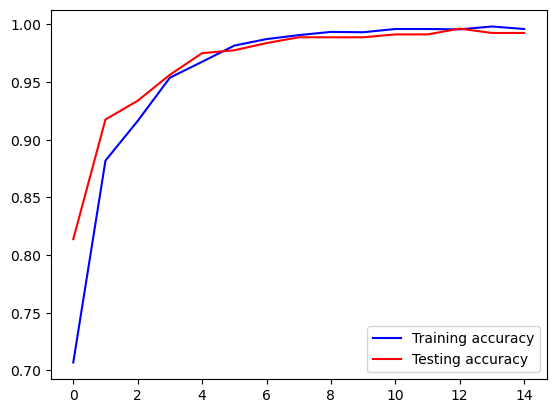

In [10]:
plt.plot(epochs, accuracy, "b", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Testing accuracy")
plt.legend()
plt.show()

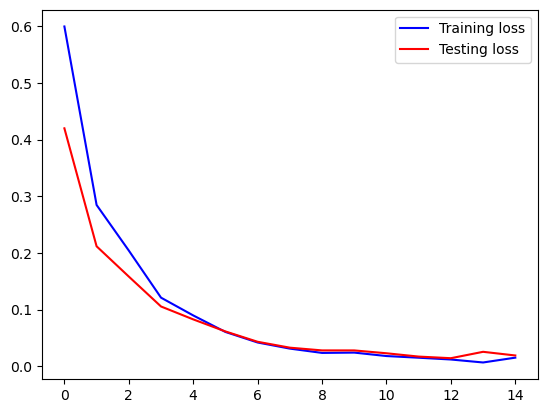

In [11]:
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Testing loss")
plt.legend()
plt.show()

In [12]:
model.save('models/trained.h5', overwrite=True) #Saving our model